# Google news 크롤링

### 보완점
1. 페이지 이동
    - 발생한 문제 : 페이지 이동이 정상적이지 않고 페이지 이동시 일부 데이터가 드랍되어 크롤링 됨
    - 해결방법 : 다시 차분하게 코드 짜보는거ㅋㅋ (귀차너..)

In [74]:
# 라이브러리 호출

from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd

In [75]:
# 웹 페이지 생성

browser = webdriver.Chrome()
url = 'https://www.google.com'
browser.get(url)

In [76]:
# 검색어 입력

key = input("검색어를 입력하세요 : ")

검색어를 입력하세요 : 카보로딩


In [77]:
# 뉴스 페이지로 이동
# 수업에서는 뉴스 버튼을 클릭하여 뉴스 페이지로 이동했다.
# 검색 결과창에서 뉴스로 이동하는 버튼의 위치가 다른 경우가 있다.
# url을 사용하여 검색어의 뉴스 페이지로 이동하는 방법 사용

browser.get('https://www.google.com/search?q='+key+'&tbm=nws&source=lnms&prmd=ivnmsbz&sa=X&ved=2ahUKEwi77vKHy6yFAxX5hlYBHVXQAo8Q0pQJegQIDxAB&cshid=1712372125583241&biw=1728&bih=941&dpr=2')

정희원 교수 “탕후루=음식의 숏폼, 60년간 당 섭취 100배 증가”(옥문아)
2023. 12. 13.
뉴스엔


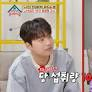

In [78]:
# 뉴스 제목, 작성일, 작성회사 -> 한 개의 기사만 읽어오기

print(browser.find_element(By.CLASS_NAME, 'n0jPhd').text)
print(browser.find_element(By.CLASS_NAME, 'rbYSKb').text)
print(browser.find_element(By.CLASS_NAME, 'MgUUmf').text)
print(browser.find_element(By.CLASS_NAME, 'uhHOwf').find_element(By.TAG_NAME, 'img').get_attribute('src'))

In [79]:
# 한 페이지의 모든 뉴스에 대해서 정보 뽑아오기

container = browser.find_elements(By.CLASS_NAME, 'lSfe4c')
news_li = []

for elem in container:
    title = elem.find_element(By.CLASS_NAME, 'n0jPhd').text
    date = elem.find_element(By.CLASS_NAME, 'rbYSKb').text
    auth = elem.find_element(By.CLASS_NAME, 'MgUUmf').text
    
    tmp = {
        '제목' : title,
        '작성일' : date,
        '작성자' : auth
    }
    
    news_li.append(tmp)

In [80]:
for i in range(len(news_li)):
    print(news_li[i]['제목'])
    print(news_li[i]['작성일'])
    print(news_li[i]['작성자'])
    print()

정희원 교수 “탕후루=음식의 숏폼, 60년간 당 섭취 100배 증가”(옥문아)
2023. 12. 13.
뉴스엔

정희원 교수 "탕후루=음식의 숏폼, 60년간 당 섭취 100배 증가"(옥문아) : 네이트 연예
2023. 12. 13.
네이트

오늘은 무리하지 말고, 붕어빵 가게까지만 달려볼까요
2022. 6. 29.
시사IN

“건강과 지구를 지키는 채식, 지금 시작하세요”
2022. 6. 6.
부산일보



# SRT 크롤링

###  보완점

1. 자세한 시각 설정
    - 발생한 문제 : 각각의 출발 시각을 가져오는 건 쉬웠으나 문자열 형태로 입력한 시각과 비교하는 부분을 구현하지 못함
    - 해결방법 : 문자열 관련 함수 혹은 간단한 숫자 연산으로 가능하나 귀찮아서...ㅎ
2. '입석+좌석'의 경우 팝업창이 뜨고 확인을 눌러야 다음으로 넘어갈 수 있다.
    - 해결방법 : 팝업창을 컨트롤 하는 방법 필요

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By

In [3]:
browser = webdriver.Chrome()
url = 'https://etk.srail.kr/cmc/01/selectLoginForm.do?pageId=TK0701000000'
browser.get(url)

In [4]:
browser.find_element(By.XPATH, '//*[@id="login-form"]/fieldset/div[1]/div[1]/div[1]/label[3]').click()

browser.find_element(By.ID, 'srchDvNm03').click()
browser.find_element(By.ID, 'srchDvNm03').send_keys('전화번호')

browser.find_element(By.ID, 'hmpgPwdCphd03').click()
browser.find_element(By.ID, 'hmpgPwdCphd03').send_keys('비밀번호')

browser.find_element(By.XPATH, '//*[@id="login-form"]/fieldset/div[1]/div[1]/div[4]/div/div[2]/input').click()

In [6]:
browser.find_element(By.CLASS_NAME, 'ico_srch').click()

In [72]:
start = input("출발지를 입력하세요 : ")

browser.find_element(By.ID, 'dptRsStnCdNm').click() # 출발역 입력창 클릭
browser.find_element(By.ID, 'dptRsStnCdNm').clear() # 출발역 입력창의 기존 값 제거
browser.find_element(By.ID, 'dptRsStnCdNm').send_keys(start) # 출발역 입력

출발지를 입력하세요 : 동대구


In [73]:
end = input('도착지를 입력하세요 : ')

browser.find_element(By.ID, 'arvRsStnCdNm').click() # 도착역 입력창 클릭
browser.find_element(By.ID, 'arvRsStnCdNm').clear() # 도착역 입력창의 기존 값 제거
browser.find_element(By.ID, 'arvRsStnCdNm').send_keys(end) # 도착역 입력

도착지를 입력하세요 : 수서


In [19]:
# 출발일 지정
# 오늘 = 0입력 -> 날짜는 오늘이 default로 설정되어 있으므로 그 이외의 날에 대해서만 설정한다.
# 해당 값은 xpath를 사용하여 설정이 가능하다.
# xpath규칙 -> 마지막 option값만 변경됨
# 1일뒤 : //*[@id="dptDt"]/option[2]
# 2일뒤 : //*[@id="dptDt"]/option[3]

date = int(input('몇일 후 출발하시겠습니까 : '))
if date != 0:
    browser.find_element(By.XPATH, '//*[@id="dptDt"]/option[{}]'.format(date + 1)).click()

몇일 후 출발하시겠습니까 : 1


In [27]:
# 출발 시각 지정
# 시각만 입력하고 분은 따로 입력하지 않았음 -> 보완점
# 00시 ~ 22시, 2시간 단위로 설정 가능 -> 간단한 연산으로 구현
# xpath값으로 시각을 설정할 수 있다.
# xpath규칙 -> option값이 00시를 1으로 시작하여 2시간마다 1씩 증가
# 00시 : //*[@id="dptTm"]/option[1]
# 02시 : //*[@id="dptTm"]/option[2]
# 20시 : //*[@id="dptTm"]/option[11]

# 출발시각 입력
time = int(input('몇시에 출발하시겠습니까 : '))

# 출발 시각을 2시간 단위로 변경
for i in range(0, 23, 2):
    if i > time:
        time = i
        break

time -= 2    
# 출발시각 입력
browser.find_element(By.XPATH, '//*[@id="dptTm"]/option[{}]'.format((time+2)//2)).click()

몇시에 출발하시겠습니까 : 13
12
7


In [29]:
# ktx의 경우 새로운 웹 페이지로 이동한다. -> 이를 방지하기 위해 srt만 검색될 수 있도록 설정
browser.find_element(By.ID, 'trnGpCd300').click()

In [30]:
# 모든 설정이 끝난 후 검색 버튼 클릭
browser.find_element(By.ID, 'search_top_tag').click()

In [63]:
# 첫 번째 기차에 대해서 매진인지 확인
# 매진인 경우 : 재검색
# 매진이 아닌 경우 : 해당 좌석 선택
# 보완점 : 현재는 첫 기차에 대해서만 검사를 진행하지만 추가적인 코드로 각각의 시각을 확인하고 설정한 시각과 가장 가까운 열차를 예매하도록 할 수 있다.

is_sold_out = browser.find_element(By.XPATH, '//*[@id="result-form"]/fieldset/div[6]/table/tbody/tr[1]/td[7]/a').text

if is_sold_out == '매진':
    browser.find_element(By.ID, 'search_top_tag').click()
    
else :
    browser.find_element(By.XPATH, '//*[@id="result-form"]/fieldset/div[6]/table/tbody/tr[1]/td[7]/a').click()